## Directions for installing Seaborn
http://stanford.edu/~mwaskom/software/seaborn/installing.html
<h3 style="font-family:Courier;font-size:10px;">Converted for Python3</h3>

# Histograms[48]

In [8]:
#Standard imports
import numpy as np
import pandas as pd
from numpy.random import randn

In [9]:
#Stats
from scipy import stats

In [10]:
#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
%matplotlib inline

(array([  1.,   1.,   6.,   9.,  21.,  20.,  21.,  14.,   5.,   2.]),
 array([-2.82198147, -2.31166927, -1.80135707, -1.29104487, -0.78073267,
        -0.27042047,  0.23989173,  0.75020393,  1.26051613,  1.77082833,
         2.28114053]),
 <a list of 10 Patch objects>)

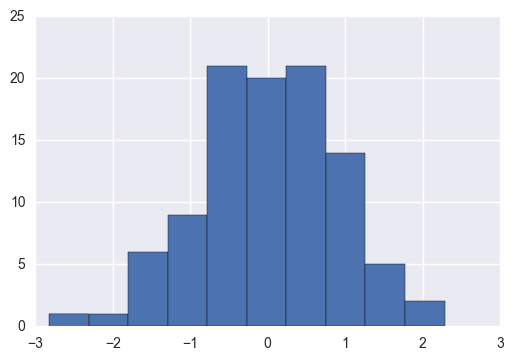

In [12]:
#Create a random, normally distributed data set
dataset1 = randn(100)
#will automatically create 10 evenly spaced bins
plt.hist(dataset1)

(array([  5.,   3.,   5.,  15.,  12.,  12.,  14.,   7.,   3.,   4.]),
 array([-2.15206799, -1.73237788, -1.31268778, -0.89299767, -0.47330756,
        -0.05361746,  0.36607265,  0.78576276,  1.20545286,  1.62514297,
         2.04483308]),
 <a list of 10 Patch objects>)

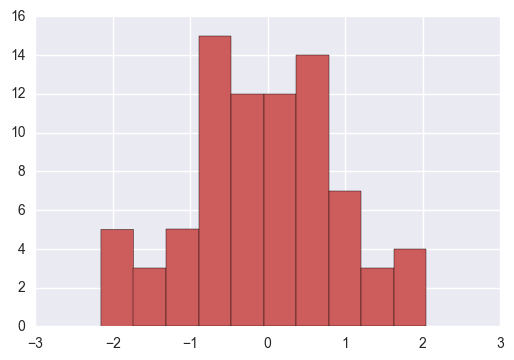

In [13]:
dataset2 = randn(80)
plt.hist(dataset2,color='indianred')

(array([ 0.23827104,  0.05956776,  0.11913552,  0.05956776,  0.17870328,
         0.11913552,  0.41697433,  0.47654209,  0.35740657,  0.35740657,
         0.35740657,  0.35740657,  0.53610985,  0.29783881,  0.17870328,
         0.23827104,  0.11913552,  0.05956776,  0.11913552,  0.11913552]),
 array([-2.15206799, -1.94222294, -1.73237788, -1.52253283, -1.31268778,
        -1.10284272, -0.89299767, -0.68315262, -0.47330756, -0.26346251,
        -0.05361746,  0.1562276 ,  0.36607265,  0.5759177 ,  0.78576276,
         0.99560781,  1.20545286,  1.41529792,  1.62514297,  1.83498802,
         2.04483308]),
 <a list of 20 Patch objects>)

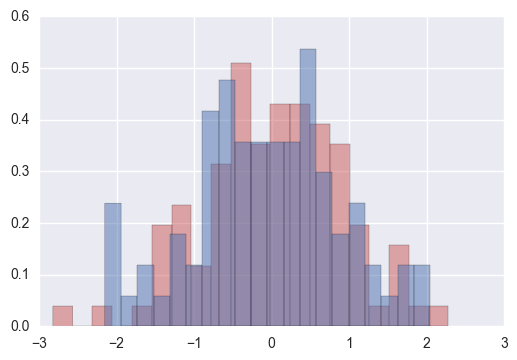

In [14]:
#Both histograms on same plot
#plots need to be normalized with normed argument (since plots have different amounts of data)
#alpha argument will control transparency
#get more bins with bin argument
plt.hist(dataset1,normed=True,color='indianred',alpha=.5,bins=20)
plt.hist(dataset2,normed=True,alpha=.5,bins=20)

In [15]:
#Use Seaborn
data1 = randn(1000)
data2 = randn(1000)
#represent as joint distribution using joint plot

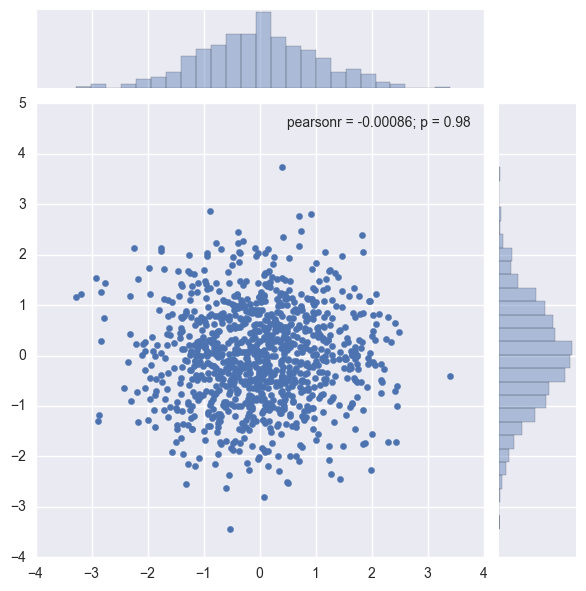

In [16]:
sns.jointplot(data1,data2)

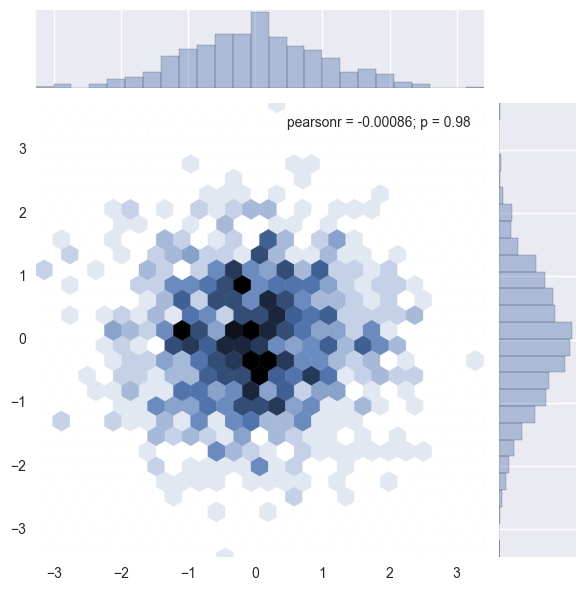

In [17]:
#use hex bins for a more concise picture
sns.jointplot(data1,data2,kind='hex')

# Kernel Density Estimation Plots[49]
## Estimating the probability density function of random variables

(0, 1)

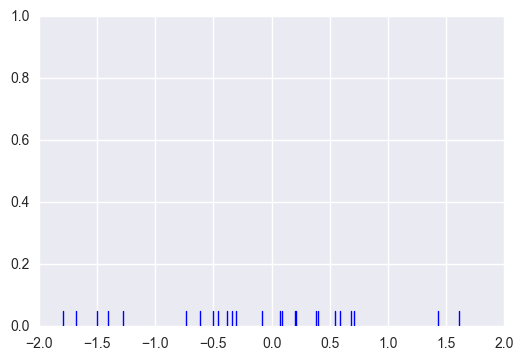

In [18]:
#Making a KDE plot manually, carpet plot
dataset = randn(25)
sns.rugplot(dataset)
plt.ylim(0,1)

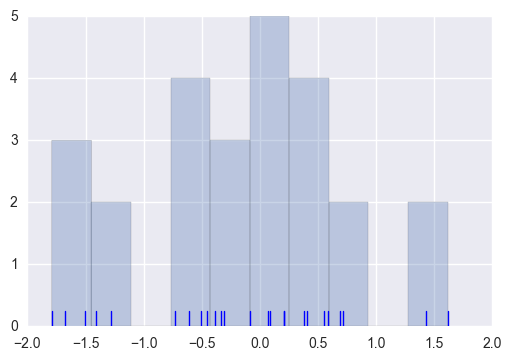

In [19]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

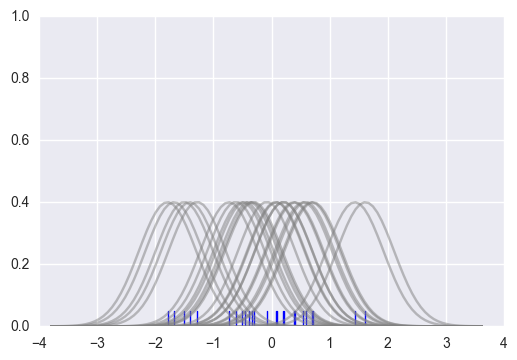

In [20]:
#KDE will represent every tick on the rugplot with a Gaussian basis function
sns.rugplot(dataset)
x_min = dataset.min() - 2
x_max = dataset.max() + 2
#set x axis to 100 evenly spaced points
x_axis = np.linspace(x_min,x_max,100)
#set the bandwidth, using estimation equation
bandwidth =((4*dataset.std()**5)/(3*len(dataset))) ** 0.2
#create a list for each kernel
kernel_list = []
for data_point in dataset:
    #Create a kernel for each point, append to list
    #Use scipy stats library and probability density formula
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel/ kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color='grey',alpha=.5)
    
plt.ylim(0,1)

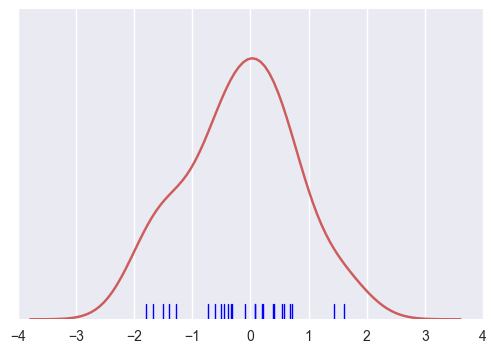

In [21]:
sum_of_kde = np.sum(kernel_list,axis=0)
fig = plt.plot(x_axis,sum_of_kde,color='indianred')
#add a rug plot
sns.rugplot(dataset)
plt.yticks([])
#sum all guassian functions and show plot
plt.suptitle=("Sum of basis functions")

C:\Users\JamesDillon\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


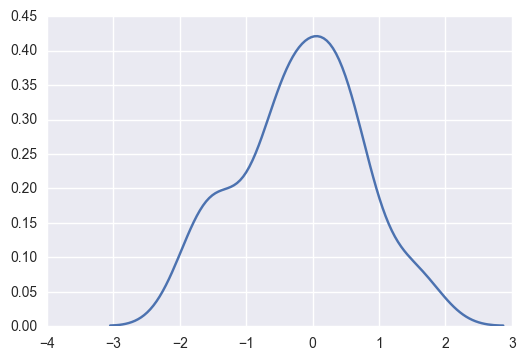

In [22]:
#This can be done in one step using Seaborn
#Create a Kernel density estimation plot with one line of code
sns.kdeplot(dataset)

C:\Users\JamesDillon\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


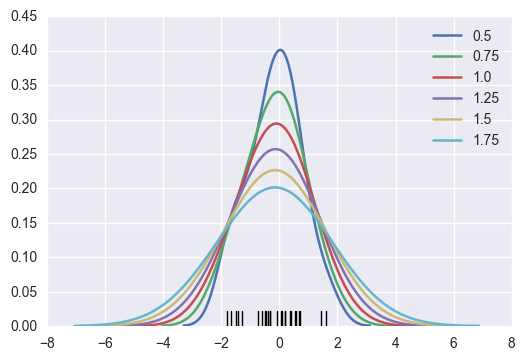

In [23]:
#Change the bandwidth to make it more or less sensitive to high frequency data points
sns.rugplot(dataset,color='black')
#make plots for various bandwidths
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

In [24]:
#Choose different types of kernels

url = 'http://en.wikipedia.org/wiki/Kernel_(statistics)'

C:\Users\JamesDillon\Anaconda3\lib\site-packages\numpy\core\numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
C:\Users\JamesDillon\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


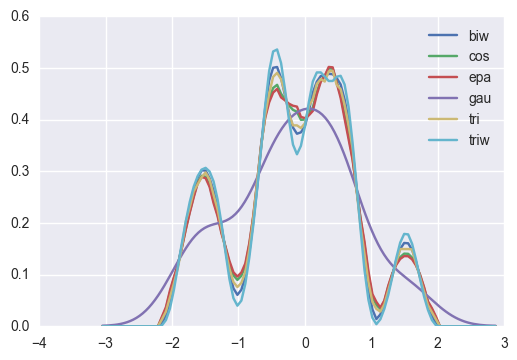

In [25]:
kernel_options = ['biw','cos','epa','gau','tri','triw']
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

C:\Users\JamesDillon\Anaconda3\lib\site-packages\numpy\core\numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
C:\Users\JamesDillon\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


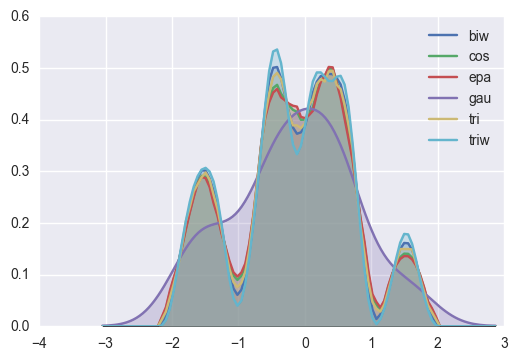

In [26]:
#Do some shading as a visual option
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)

C:\Users\JamesDillon\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


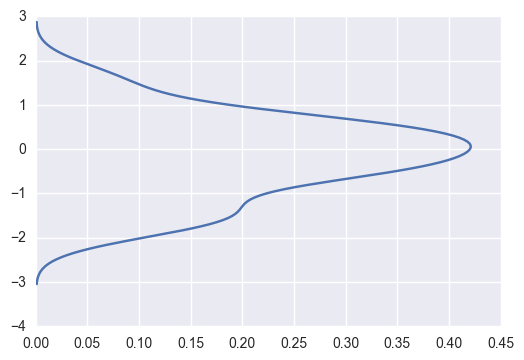

In [27]:
#Plot on the vertical axis
sns.kdeplot(dataset,vertical=True)

In [28]:
#Use a kde plot to create a cumulative distribution function

url = 'http://en.wikipedia.org/wiki/Cumulative_distribution_function'

C:\Users\JamesDillon\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


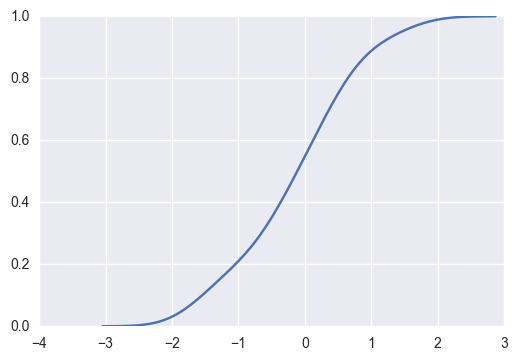

In [29]:
sns.kdeplot(dataset,cumulative=True)

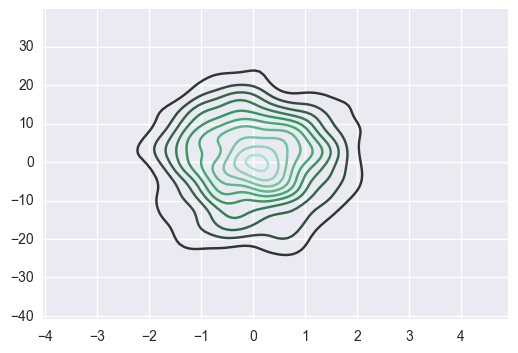

In [30]:
#You can do KDE plots for multidimensional data
mean = [0,0]
cov = [[1,0],[0,100]]
#create a random, normally distributed dataset
dataset2 = np.random.multivariate_normal(mean,cov,1000)
dframe = pd.DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(dframe)

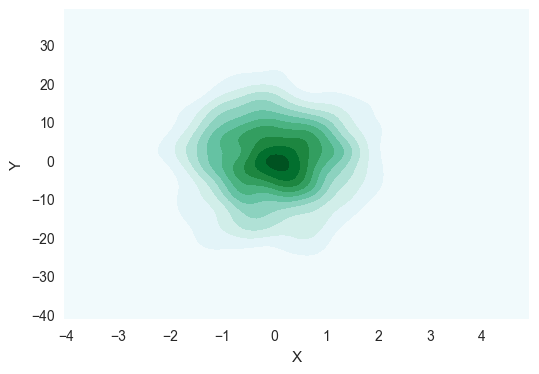

In [31]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

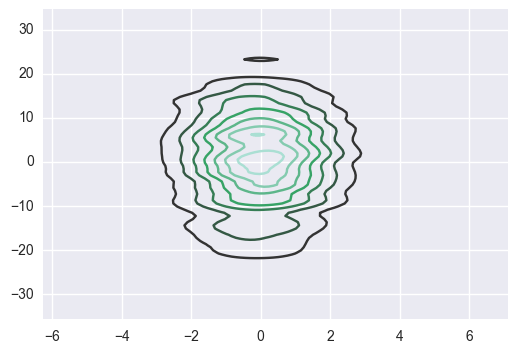

In [32]:
#Bandwidths can also be specified
sns.kdeplot(dframe,bw=1)

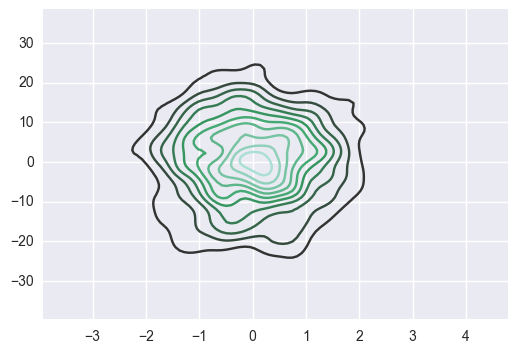

In [33]:
#Use the silverman estimation bandwidth
sns.kdeplot(dframe,bw='silverman')

C:\Users\JamesDillon\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


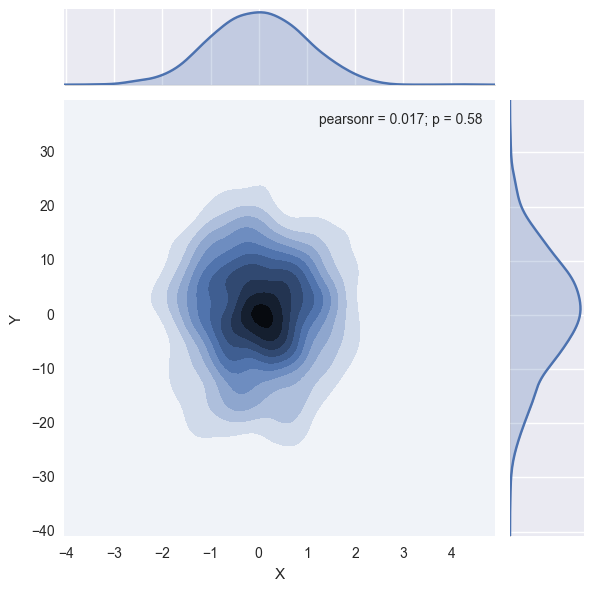

In [34]:
#Create a KDE jointplot
sns.jointplot('X','Y',dframe,kind='kde')